<a href="https://colab.research.google.com/github/nberry5/DCS-210/blob/main/Berry_proj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")

In [ ]:
install.packages("scales")

In [ ]:
install.packages("fivethirtyeight")

In [ ]:
library(tidyverse)
library(scales)
library(fivethirtyeight)
library(ggplot2)

In [28]:
?college_recent_grads

In [ ]:
glimpse(college_recent_grads)

In [6]:
crg <- college_recent_grads

In [ ]:
glimpse(crg)

In [ ]:
crg %>%
  arrange(unemployment_rate) %>%
  select(rank, major, unemployment_rate) %>%
  mutate(unemployment_rate = percent(unemployment_rate, 0.01))

# Mathematics and Computer Science
# Military Technologies
# Botany
# Soil Science
# Educational Administration And Supervision

In [ ]:
crg %>%
  arrange(desc(sharewomen)) %>%
  select(major, total, sharewomen) %>%
  mutate(sharewomen = percent(sharewomen, 0.01)) %>%
  top_n(3)

# Early Childhood Education
# Communication Disorders Sciences and Services
# Medical Assisting Services

In [ ]:
# 2

# Because the mean is sensitive to outliers, and there may be people in a given
# group who make a very high salary (business executives, etc.), even if most
# people in that group do not.

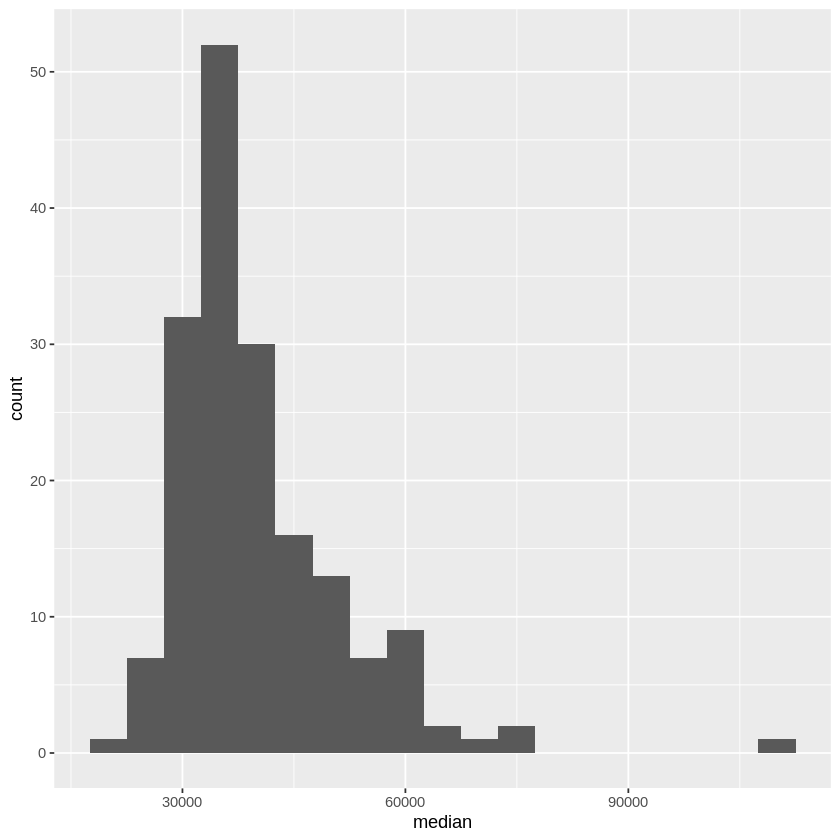

In [31]:
ggplot(data = crg, mapping = aes(x = median)) +
  geom_histogram(binwidth = 5000)

# I chose 5000 because with 1000, the bars were too thin and it was difficult
# to see the general trends. Salary varies too much to visualize by 1000.

In [ ]:
crg %>%
  summarise(min = min(median), max = max(median),
    mean = mean(median), med = median(median),
    sd = sd(median),
    q1 = quantile(median, probs = 0.25),
    q3 = quantile(median, probs = 0.75))

4)

The median salary across all majors is 36,000. The lowest salary is 22,000, while the highest is 110,000, which is an outlier - there are no values between 80,000 and 100,000. This causes the overall mean (40,151) to be higher than the overall median.

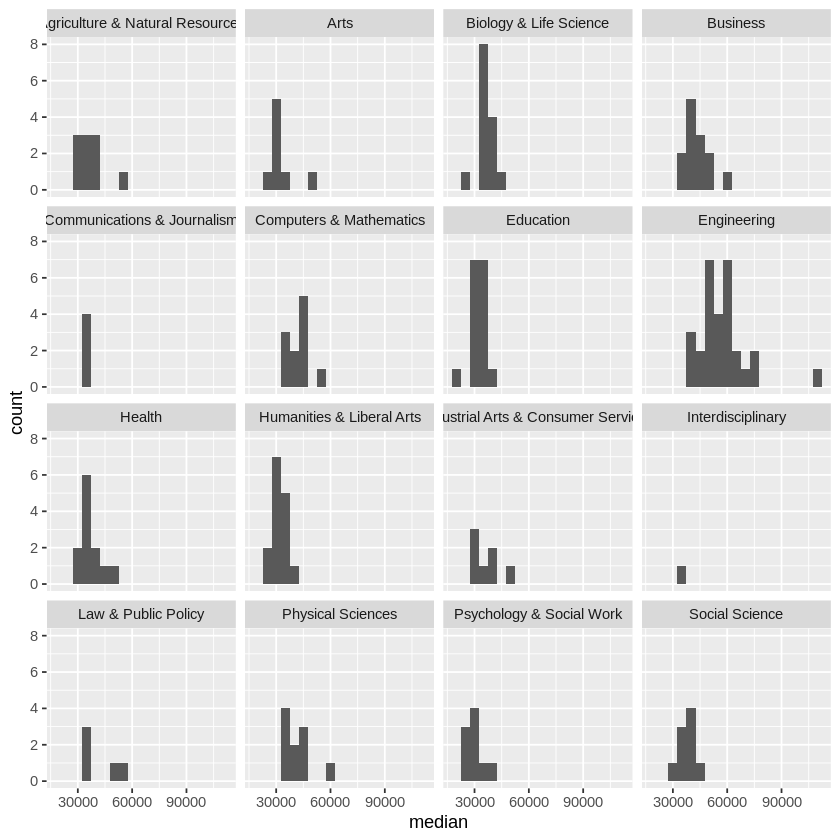

In [33]:
ggplot(data = crg, mapping = aes(x = median)) +
  geom_histogram(binwidth = 5000) +
  facet_wrap(~major_category)

In [ ]:
crg %>%
  group_by(major_category) %>%
  summarise(med = median(median)) %>%
  arrange(desc(med))

# Engineering

In [ ]:
college_recent_grads %>%
  count(major_category) %>%
  arrange(n)

# Interdisciplinary

In [12]:
stem_categories <- c("Biology & Life Science",
  "Computers & Mathematics",
  "Engineering",
  "Physical Sciences")

In [13]:
crg <- crg %>%
  mutate(major_type = ifelse(major_category %in% stem_categories, "stem", "not stem"))

In [14]:
crg_stem_under_med <- crg %>%
  filter(
    major_type == "stem",
    median < 36000
  )

In [ ]:
crg_stem_under_med %>%
  group_by(major) %>%
  summarise(
    med = median(median),
    low_q = quantile(median, probs = .25),
    hi_q = quantile(median, probs = .75)
  ) %>%
  arrange(desc(med))

Warning message:
“Removed 1 rows containing missing values (geom_point).”


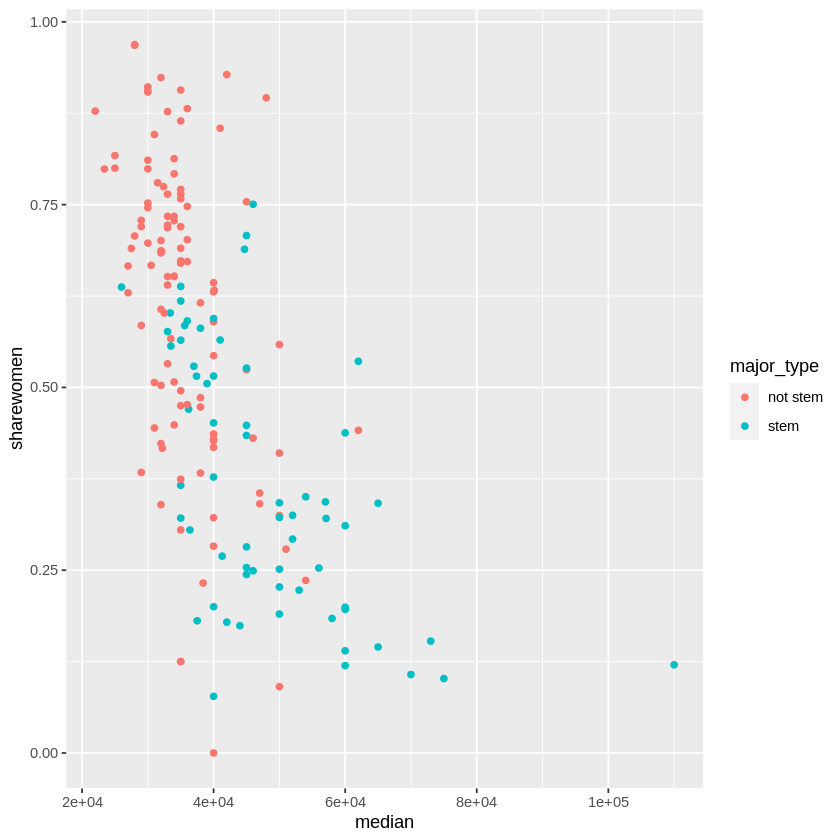

In [17]:
ggplot(data = crg, aes(x = median, y = sharewomen, color = major_type)) + 
  geom_point()

In [19]:
?college_recent_grads

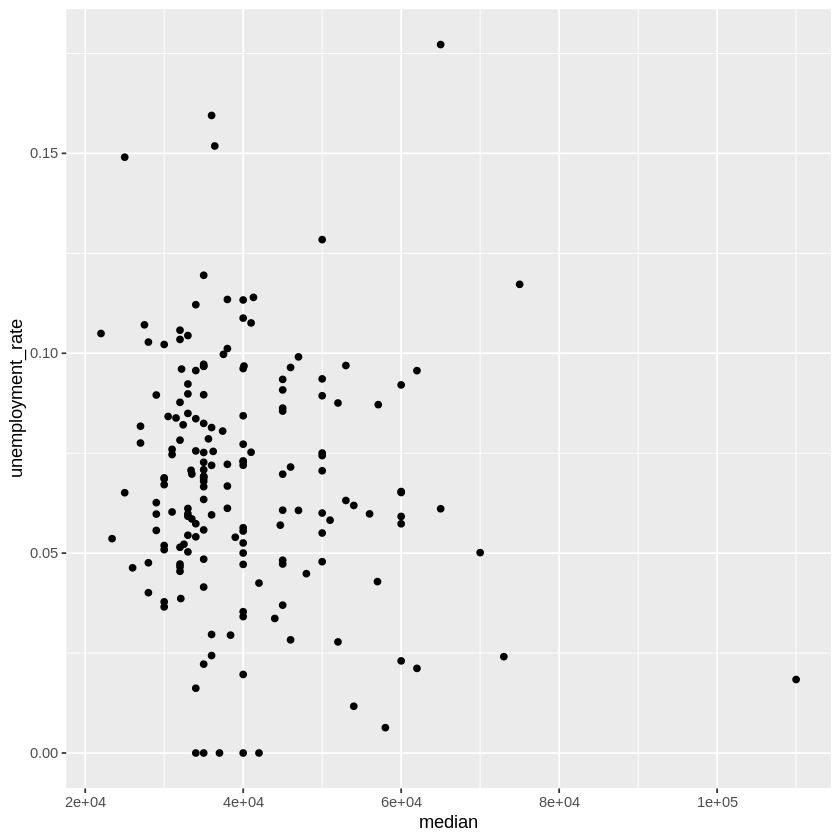

In [9]:
# is there a relationship between high salary majors and unemployment rate?

ggplot(data = crg, aes(x = median, y = unemployment_rate)) + 
  geom_point()